In [92]:
# join both validation dataframes
import pandas as pd
paths = ["../Results/sam_results.txt", "../Results/joey_results.txt"]
dfs = [pd.read_csv(path, index_col = False, sep = "\t") for path in paths]
df = pd.concat(dfs)
print(df.shape)
df.to_csv("../Results/validation_results.txt", sep = "\t", index = False)

(18892, 16)


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def validation_to_command(df, index):
    df = df.iloc[index,:]
    d = {"dataset":"Dataset", "test_dataset":"Test Dataset", "epochs":"Max Epochs", "early_stopping":"Early Stopping",
         "graph_conv_dimensions":"Graph Convolution Dimensions", "connected_dimensions":"Fully Connected Dimensions",
         "learning_rate":"Learning Rate", "dropout":"Dropout", "attention_dim":"Attention Dimension",
         "attention_bias":"Attention Bias","balanced_training":"Balanced Training","weight_decay":"Weight Decay",
         "model":"Model", "max_degree":"Max Degree"}
    command = "python train.py -save_test True -save_validation False "
    for val in d:
        command += f"-{val} {df[d[val]]} "
    return command

def histogram(num_bins = 100, protease = None, min_acc = 0, column_distribution = None, req_ls = [], path = "../Results/validation_results.txt"):
    df = pd.read_csv(path, index_col = False, sep = "\t")
    # select by protease
    if protease != None:
        if "[" in protease:
            df = df.loc[df["Dataset"].map(lambda x: ("protease_"+protease+"_selector") in x and "[" in x)]
        else:
            df = df.loc[df["Dataset"].map(lambda x: ("protease_"+protease+"_selector") in x and "[" not in x)]
    else: protease = "All"
    # remove models under some accuracy
    df = df.loc[df["Validation Accuracy"].map(lambda x: x > min_acc)]
    # filter by some req
    for req in req_ls: df = df.loc[df[req[0]].map(lambda x: str(req[1]) in str(x))]
    num = len(list(df["Validation Accuracy"]))
    print(f"Number of models that meet requirements: {num}")
    # plot categories or all
    if column_distribution == None:
        x = list(df["Validation Accuracy"])
        bins = np.linspace(min_acc, 1, int(num_bins * (1 - min_acc)))
        plt.hist(x, alpha=0.5, density=True, bins=bins)
        plt.ylabel('Frequency')
        plt.xlabel('Validation Accuracy')
        plt.title(f'Distribution for {protease} with Requirements {req_ls}')
        plt.show()
        index_best = x.index(max(x))
        print(f"Validation Accuracy: {df.iloc[index_best,2]}")
        command = validation_to_command(df, index_best)
        return command
    else:
        bins = np.linspace(min_acc, 1, int(num_bins * (1 - min_acc)))
        vals = list(set(df[column_distribution]))
        vals.sort()
        for val in vals:
            temp_df = df.loc[df[column_distribution].map(lambda x: val == x)]
            x = list(temp_df["Validation Accuracy"])
            plt.hist(x, bins, alpha=0.5, label=val)
        plt.title(f'Distribution for {protease} with Requirements {req_ls}')
        plt.ylabel('Frequency')
        plt.xlabel('Validation Accuracy')
        plt.legend(loc='center right', title=column_distribution, bbox_to_anchor=(1 + 2/100 * len(vals[0]), 0.5))
        plt.show()


Number of models that meet requirements: 964


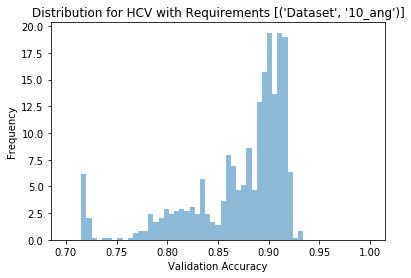

Validation Accuracy: 0.9332425
Number of models that meet requirements: 985


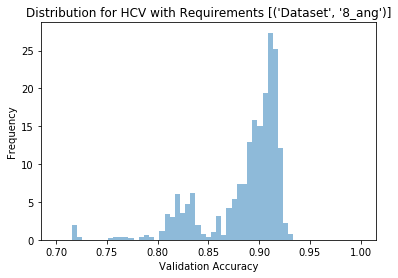

Validation Accuracy: 0.93051773
Number of models that meet requirements: 1454


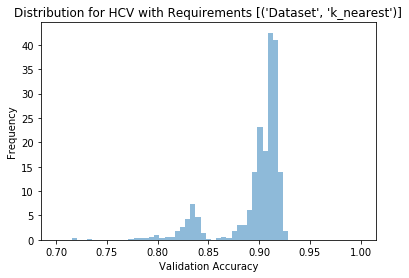

Validation Accuracy: 0.9277929
Number of models that meet requirements: 730


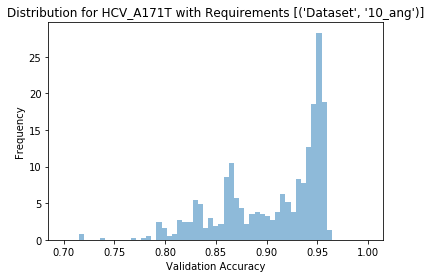

Validation Accuracy: 0.9606359
Number of models that meet requirements: 974


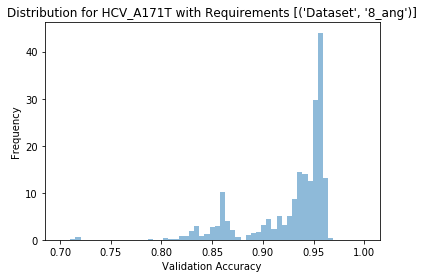

Validation Accuracy: 0.9659349
Number of models that meet requirements: 1435


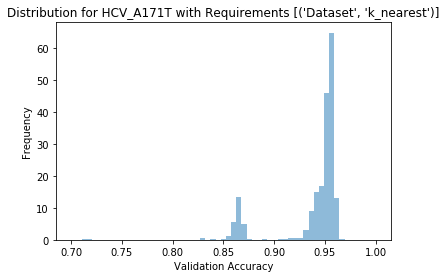

Validation Accuracy: 0.9651779
Number of models that meet requirements: 893


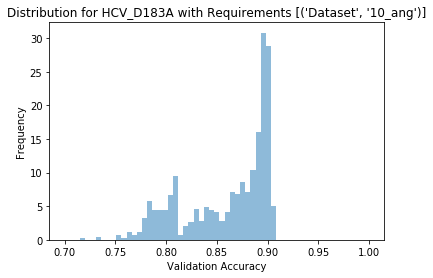

Validation Accuracy: 0.9080944
Number of models that meet requirements: 955


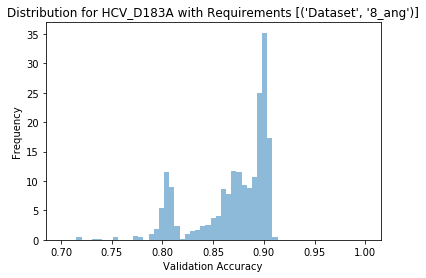

Validation Accuracy: 0.9097808
Number of models that meet requirements: 1431


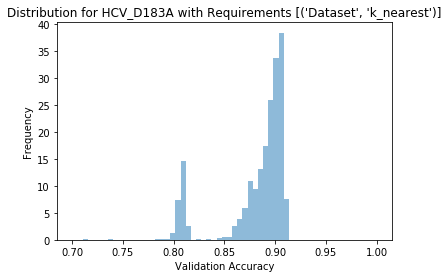

Validation Accuracy: 0.91315347
Number of models that meet requirements: 875


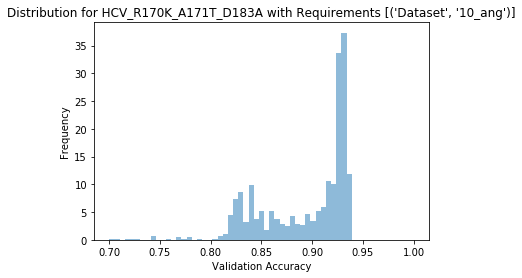

Validation Accuracy: 0.9385965
Number of models that meet requirements: 917


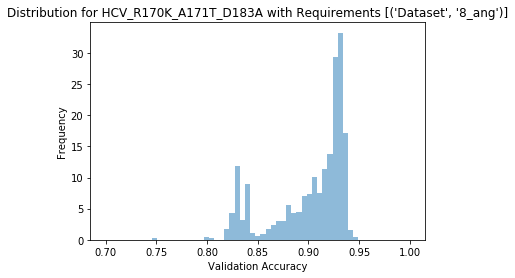

Validation Accuracy: 0.9444444
Number of models that meet requirements: 1382


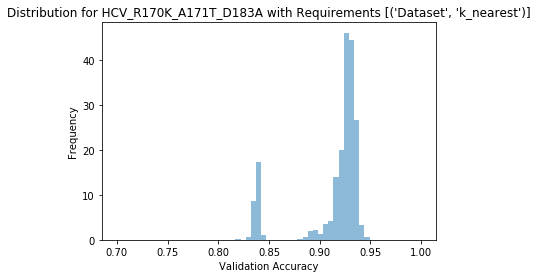

Validation Accuracy: 0.94590646
Number of models that meet requirements: 569


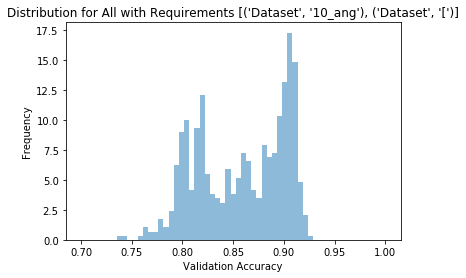

Validation Accuracy: 0.924586
Number of models that meet requirements: 955


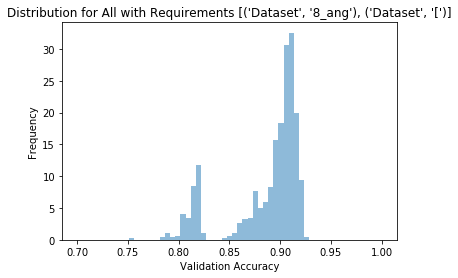

Validation Accuracy: 0.924586
Number of models that meet requirements: 1457


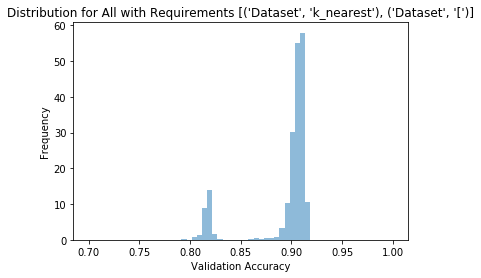

Validation Accuracy: 0.9174522
['python train.py -save_test True -save_validation False -dataset '
 'protease_HCV_selector_10_ang_ratio_0_params_7 -test_dataset testset -epochs '
 '2000 -early_stopping 300 -graph_conv_dimensions [10,10,] '
 '-connected_dimensions [] -learning_rate 0.005 -dropout 0.2 -attention_dim 10 '
 '-attention_bias 2 -balanced_training False -weight_decay 0.0005 -model '
 'gcn_cheby -max_degree 3 ',
 'python train.py -save_test True -save_validation False -dataset '
 'protease_HCV_selector_8_ang_ratio_0_params_3 -test_dataset testset -epochs '
 '2000 -early_stopping 300 -graph_conv_dimensions [20,20,20,] '
 '-connected_dimensions [20,] -learning_rate 0.005 -dropout 0.0 -attention_dim '
 '10 -attention_bias 3 -balanced_training False -weight_decay 0.0005 -model '
 'gcn_cheby -max_degree 3 ',
 'python train.py -save_test True -save_validation False -dataset '
 'protease_HCV_selector_k_nearest_ratio_0_params_3 -test_dataset testset '
 '-epochs 2000 -early_stopping 30

In [98]:
# write out best parameters found
proteases = ["HCV", "HCV_A171T", "HCV_D183A", "HCV_R170K_A171T_D183A"]
neighborhoods = ["10_ang", "8_ang", "k_nearest"]
commands = []
for p in proteases:
    for n in neighborhoods:
        commands.append(histogram(num_bins = 200, protease = p, min_acc = .7, req_ls = [("Dataset",n)]))
for n in neighborhoods:
    commands.append(histogram(num_bins = 200, min_acc = .7, req_ls = [("Dataset",n), ("Dataset", "[")]))
import pprint
pprint.pprint(commands)
with open("../GenerateTexts/testing_commands.txt", "w") as fh:
    for command in commands: fh.write(f"{command}\n")

Number of models that meet requirements: 964


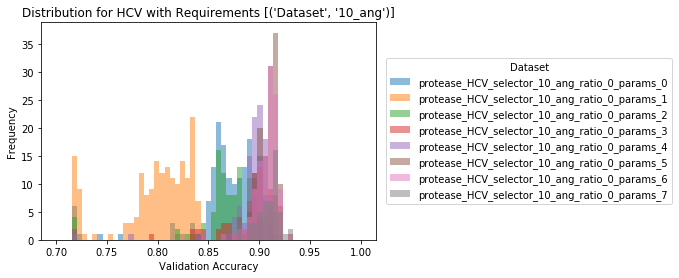

Number of models that meet requirements: 985


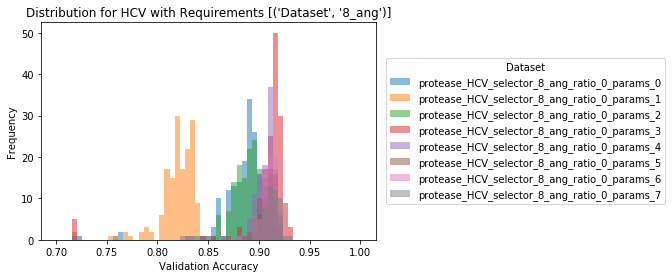

Number of models that meet requirements: 1454


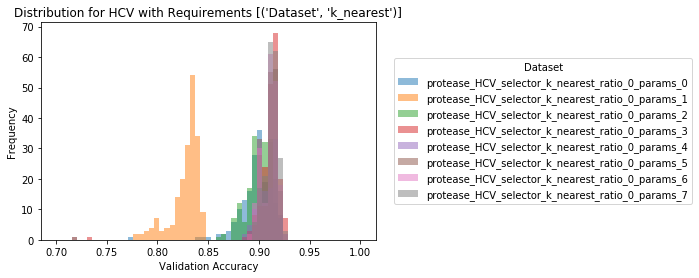

Number of models that meet requirements: 730


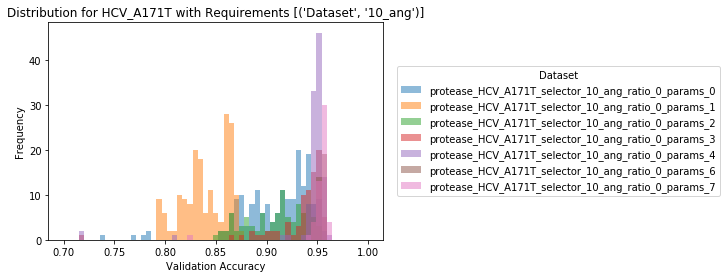

Number of models that meet requirements: 974


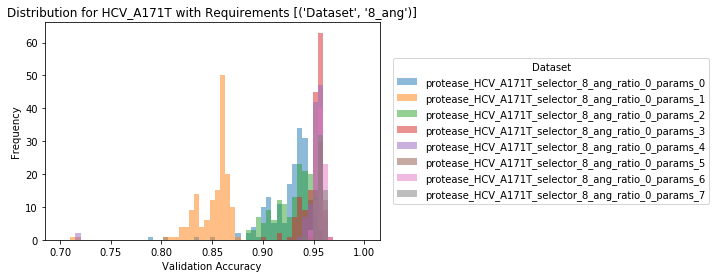

Number of models that meet requirements: 1435


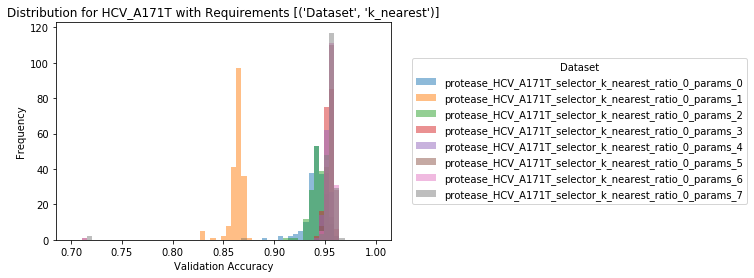

Number of models that meet requirements: 893


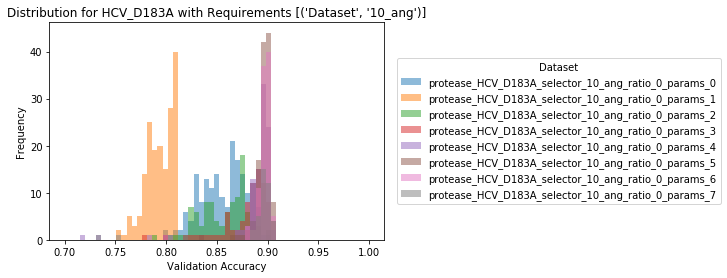

Number of models that meet requirements: 955


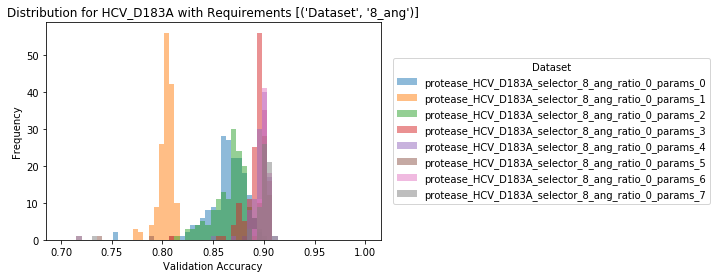

Number of models that meet requirements: 1431


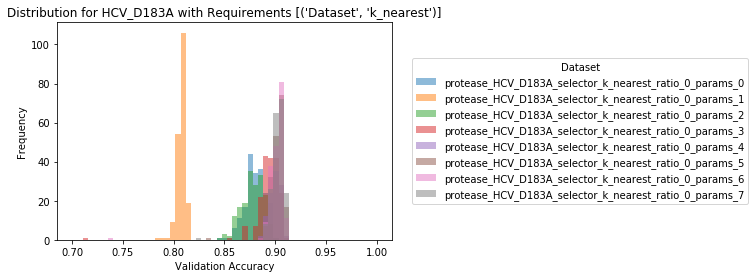

Number of models that meet requirements: 875


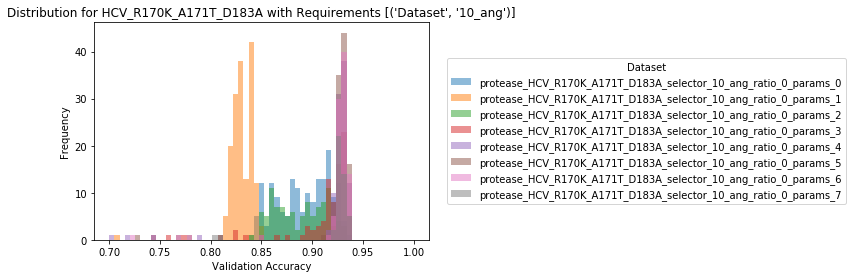

Number of models that meet requirements: 917


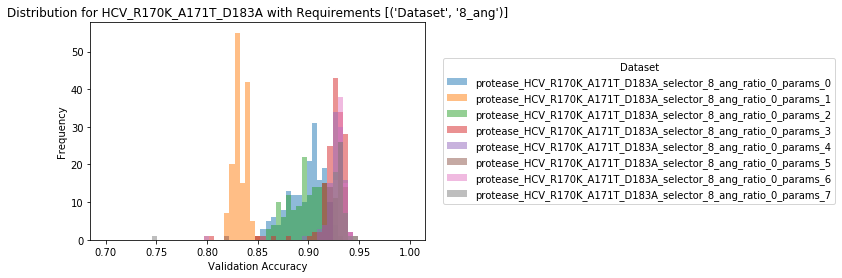

Number of models that meet requirements: 1382


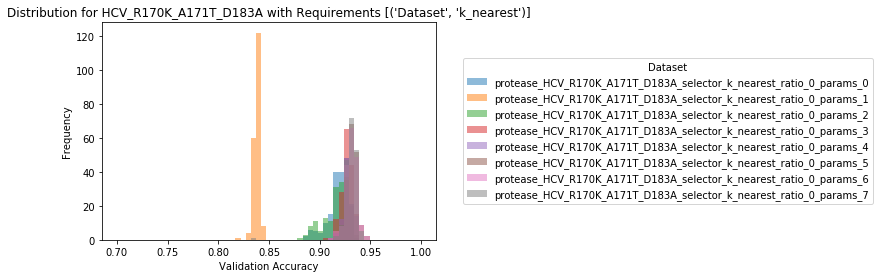

In [89]:
# see distribution of params for each group
proteases = ["HCV", "HCV_A171T", "HCV_D183A", "HCV_R170K_A171T_D183A"]
neighborhoods = ["10_ang", "8_ang", "k_nearest"]
for p in proteases:
    for neighbor in neighborhoods:
        histogram(num_bins = 200, protease = p, min_acc = .7,
              req_ls = [("Dataset",neighbor)], column_distribution="Dataset")